In [2]:
#Install snapml
!pip install snapml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.0 MB/s eta 0:00:00


In [3]:
#Importing the necessary libraries
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.utils.class_weight import compute_sample_weight
import time
import warnings
warnings.filterwarnings('ignore')

In [4]:
#We read the dataset from the url and save it in df
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
df = pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#df has 284315 observations for class 0 and 492 observations for class 1
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
print(f'There are: {df.shape[0]} rows in the dataset and {df.shape[1]} columns')

There are: 284807 rows in the dataset and 31 columns


In [7]:
#All the columns are float64 except class column which is int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

###Usually **financial instituitions** have very big datasets with hundreds of thousands of data and in order to simulate this, we will replicate this dataset 10 times and append it to the original dataset

In [8]:
n_replicas = 10

big_raw_data = pd.DataFrame(np.repeat(df.values, n_replicas, axis = 0), columns = df.columns)

big_raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


In [9]:
print(f"There are {big_raw_data.shape[0]} rows and {big_raw_data.shape[1]} columns in the dataset")

There are 2848070 rows and 31 columns in the dataset


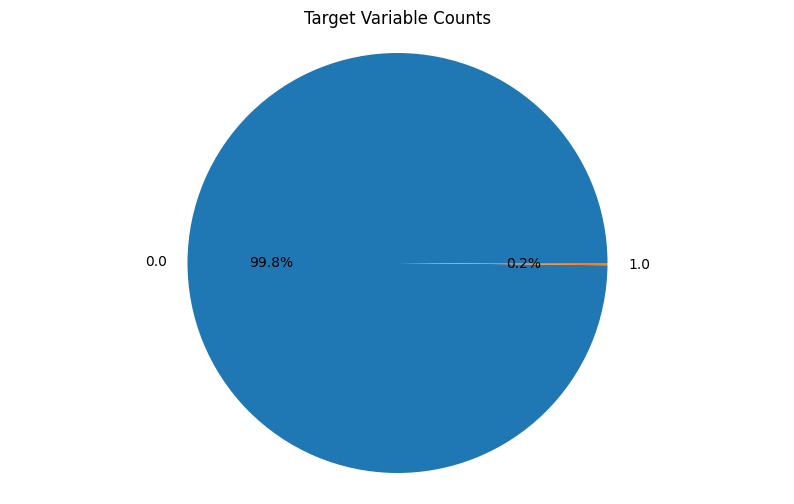

In [10]:
labels = big_raw_data.Class.unique()
counts = big_raw_data.Class.value_counts()

plt.figure(figsize = (10, 6))
plt.pie(counts, labels = labels, autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Target Variable Counts')
plt.show()

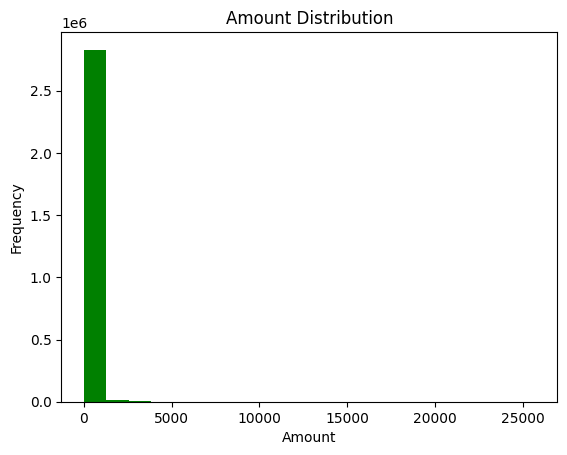

Minimum Amount Value is: 0.0
Maximum Amount Value is: 25691.16


In [11]:
plt.hist(big_raw_data.Amount.values, bins = 20, histtype = 'bar', facecolor = 'g')
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()
print(f'Minimum Amount Value is: {big_raw_data.Amount.min()}')
print(f'Maximum Amount Value is: {big_raw_data.Amount.max()}')

In [12]:
#We are going to scale the data using StandardScaler()
sc = StandardScaler()
big_raw_data.iloc[:, 1:30] = sc.fit_transform(big_raw_data.iloc[:, 1:30])
data_matrix = big_raw_data.values

X = data_matrix[:, 1:30]
y = data_matrix[:, -1]

In [13]:
X = normalize(X, norm = 'l1')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [15]:
w_train = compute_sample_weight('balanced', y_train)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 4, random_state = 35)

t0 = time.time()
dt.fit(X_train, y_train, sample_weight = w_train)
dt_time = time.time() - t0
print('The time it took to perform decision tree classification is: {0:.5f}'.format(dt_time))

The time it took to perform decision tree classification is: 28.22298


In [21]:
from snapml import DecisionTreeClassifier

snapml_dt = DecisionTreeClassifier(max_depth = 4, random_state = 35, n_jobs = 15)
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight = w_train)
snapml_dt_time = time.time() - t0
print('Time taken to train Snap ML Decision Tree Classifier is: {0:.5f}'.format(snapml_dt_time))

Time taken to train Snap ML Decision Tree Classifier is: 5.89296


In [27]:
from sklearn.metrics import roc_auc_score
sklearn_pred = dt.predict_proba(X_test)[:, 1]
sklearn_score = roc_auc_score(y_test, sklearn_pred)
print('The score for scikit-learn model is: {0:.2f}'.format(sklearn_score))

snapml_pred = snapml_dt.predict_proba(X_test)[:, 1]
print('The score for snapml model is: {0:.2f}'.format(roc_auc_score(y_test, snapml_pred)))

The score for scikit-learn model is: 0.97
The score for snapml model is: 0.97


In [29]:
from sklearn.svm import LinearSVC
svm = LinearSVC(class_weight = 'balanced', loss = 'hinge', random_state = 31, fit_intercept = False)

t0 - time.time()
svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print('Tiem taken to train sklearn SVM model is: {0:.5f}s'.format(sklearn_time))

Tiem taken to train sklearn SVM model is: 956.43979s


In [39]:
from snapml import SupportVectorMachine

snapml_svm = SupportVectorMachine(class_weight = 'balanced', random_state = 31, fit_intercept = False, use_gpu = True)

t0 = time.time()
snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print('Time taken to train snapml SVM model is: {0:.5f}s'.format(snapml_time))

Time taken to train snapml SVM model is: 6.74927s


In [35]:
print('The time taken by SVM is reduced by: {0:.2f}'.format(sklearn_time / snapml_time))

sklear_pred = svm.decision_function(X_test)
sklearn_score = roc_auc_score(y_test, sklearn_pred)

snapml_pred = snapml_svm.decision_function(X_test)
snapml_score = roc_auc_score(y_test, snapml_pred)

print('The score by the Scikit learn SVM model is: {0:.3f}'.format(sklearn_score))
print('The score by the Snapml SVM model is: {0:.3f}'.format(snapml_score))

The time taken by SVM is reduced by: 137.30
The score by the Scikit learn SVM model is: 0.966
The score by the Snapml SVM model is: 0.984


In [37]:
from sklearn.metrics import hinge_loss

print('The hinge loss by the Scikit learn SVM model is: {0:.3f}'.format(hinge_loss(y_test, sklearn_pred)))
print('The hinge loss by the Snapml SVM model is: {0:.3f}'.format(hinge_loss(y_test, snapml_pred)))

The hinge loss by the Scikit learn SVM model is: 1.091
The hinge loss by the Snapml SVM model is: 0.233
